# Table of Contents
01. Importing libraries
02. Importing data
03. Data preprocessing
<br>I. Derive a new variable 'price/sqft'
<br>II. Create a new dataframe containing only the 'date' and 'price/sqft' variables
<br>III. For each day in 'date', calculate the average 'price/sqft'
<br>IV. Find and add missing dates to have a continuous timeline
<br>V. Impute missing values where a new date has been added
04. Create a line chart of the time series
<br>Smooth data using a 7-day Simple Moving Average
05. Decompose the data’s components
06. Conduct a Dickey-Fuller test to check for stationarity
07. Stationarizing the data
<br>Conduct a Dickey-Fuller test to check for stationarity
08. Check data’s autocorrelations

# 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import quandl
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# 02. Importing data

In [2]:
# Import data from 'kc_house_data.csv'
df = pd.read_csv(r'/Users/alberttran/House Sales Analysis/02 Data/Original Data/kc_house_data.csv')

In [3]:
# Check the number of rows and columns
df.shape

(21613, 21)

In [4]:
# Display the top 5 rows
pd.set_option('display.max_columns', None)
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Display columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# 03. Data preprocessing

In [6]:
# Convert 'date' from 'object' to 'datetime'
df['date'] = pd.to_datetime(df['date'])

In [7]:
# Remove 'id' column
df.drop('id', axis = 1, inplace = True)

The objective of the analysis is to investigate how home sales prices changed over time, so the data will be preprocessed as follows:
- Derive a new variable 'price/sqft'
- Create a new dataframe containing only the 'date' and 'price/sqft' variables
- For each day in 'date', calculate the average 'price/sqft'
- Find and add missing dates to have a continuous timeline
- Impute missing values where a new date has been added

## I. Derive a new variable 'price/sqft'

In [8]:
# Derive a new variable 'price/sqft'
df['price/sqft'] = df['price'] / df['sqft_living']

In [9]:
# Display the top 5 rows
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,233.766234
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,308.163265
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,303.571429


## II. Create a new dataframe containing only the 'date' and 'price/sqft' variables

In [10]:
# Create a new dataframe containing only the 'date' and 'price/sqft' variables
df_date_price = df[['date', 'price/sqft']]

## III. For each day in 'date', calculate the average 'price/sqft'

In [11]:
# Create a dataframe where the average 'price/sqft' is calculated for each day in 'date'

# Group 'df_date_price' by 'date' and aggregate by mean
df_date_price = df_date_price.groupby('date').agg(['mean'])

# Create a temporary Pandas series
temp = df_date_price['price/sqft']['mean']

# Convert Pandas series to dataframe
df_date_price = pd.DataFrame({'date': temp.index, 'price/sqft': temp.values})

In [12]:
# Set 'date' as the index of the dataframe
df_date_price = df_date_price.set_index('date')

## IV. Find and add missing dates to have a continuous timeline

In [13]:
# Find missing dates
pd.date_range(start = df_date_price.index[0], end = df_date_price.index[-1]).difference(df_date_price.index)

DatetimeIndex(['2014-11-27', '2014-12-25', '2014-12-28', '2015-01-01',
               '2015-01-03', '2015-01-04', '2015-01-11', '2015-01-18',
               '2015-02-08', '2015-05-16', '2015-05-17', '2015-05-18',
               '2015-05-19', '2015-05-20', '2015-05-21', '2015-05-22',
               '2015-05-23', '2015-05-25', '2015-05-26'],
              dtype='datetime64[ns]', freq=None)

In [14]:
# Add missing dates
df_time_final = df_date_price.reindex(pd.date_range(start = df_date_price.index[0], end = df_date_price.index[-1]))

## V. Impute missing values where a new date has been added

In [15]:
# Add missing 'price/sqft' values using mean imputation
df_time_final.fillna(df_time_final['price/sqft'].mean(), inplace = True)

# 04. Create a line chart of the time series

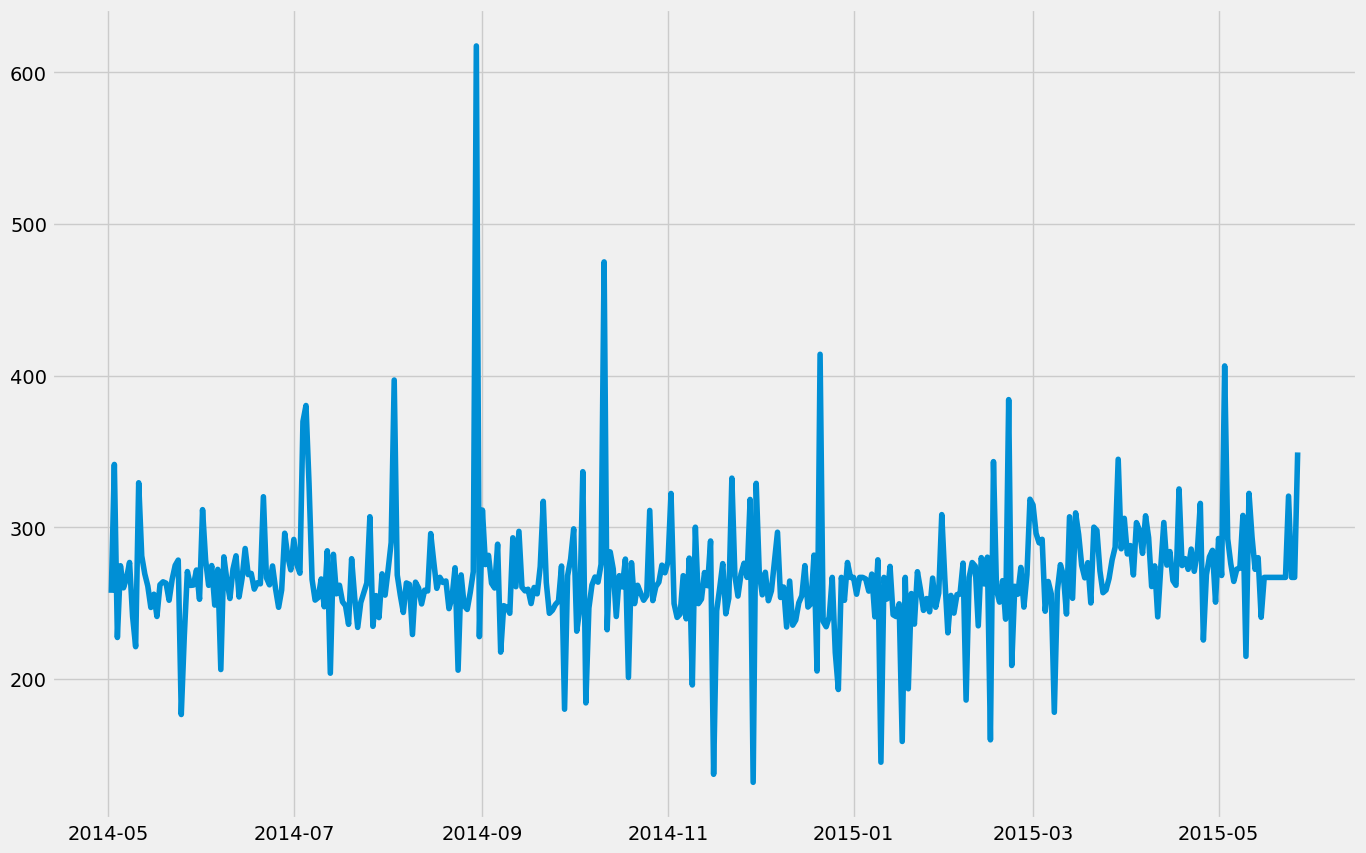

In [16]:
# Create a line chart
plt.figure(figsize=(15, 10), dpi=100)
plt.plot(df_time_final)
plt.show()

There are a lot of random fluctuations in the time series, which can be considered noise. Thus, smoothing will be applied.

## Smooth data using a 7-day Simple Moving Average

In [17]:
# Compute 7-day Simple Moving Average
df_time_final['price/sqft_mov_avg'] = df_time_final['price/sqft'].rolling(7).mean()

In [18]:
# Remove 'price/sqft' column
df_time_final.drop('price/sqft', axis = 1, inplace = True)

# Remove rows with NAs
df_time_final.dropna(inplace=True)

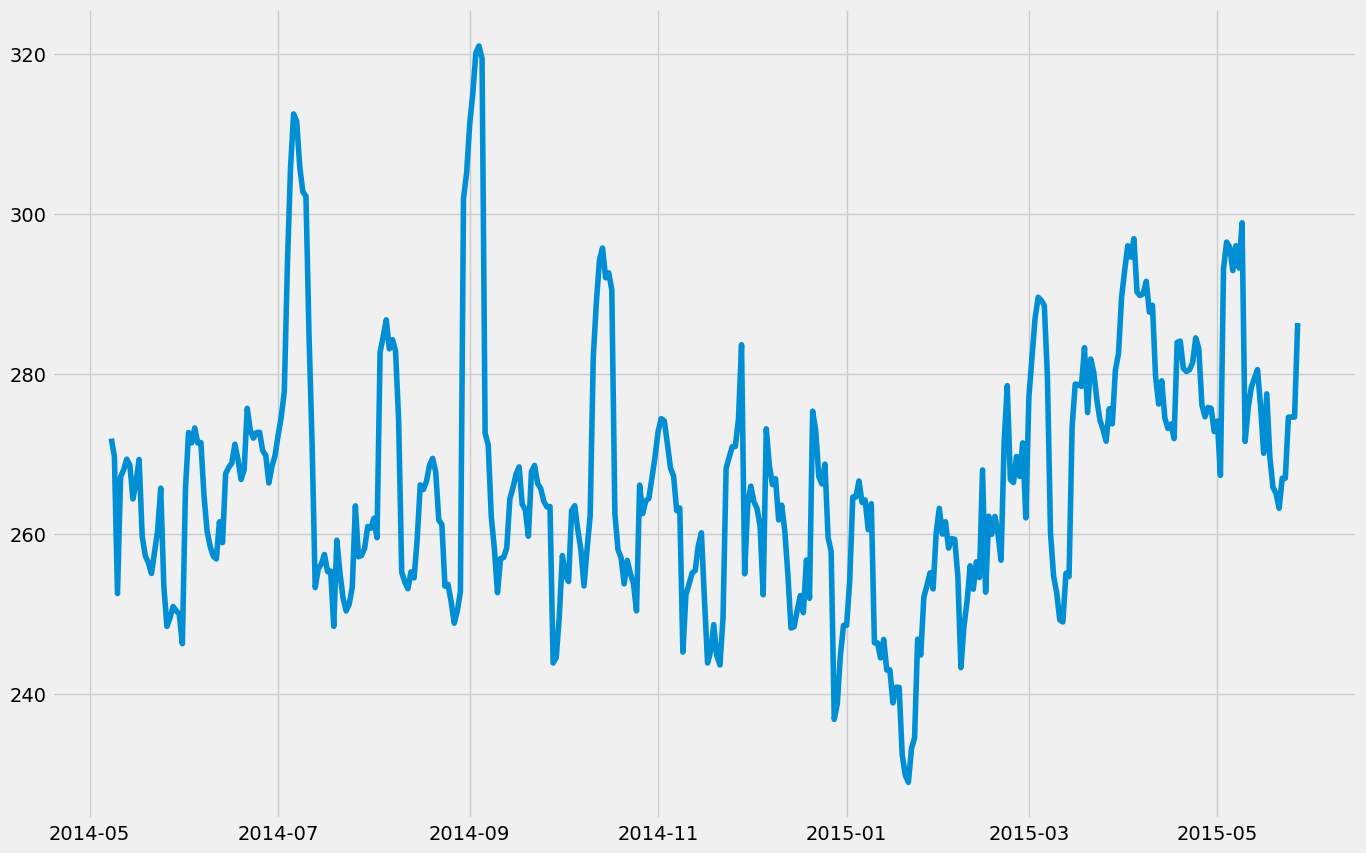

In [19]:
# Create a line chart
plt.figure(figsize=(15, 10), dpi=100)
plt.plot(df_time_final)
plt.show()

# 05. Decompose the data’s components

In [20]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_time_final, model='additive')

In [21]:
# Define a fixed size for all special charts
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

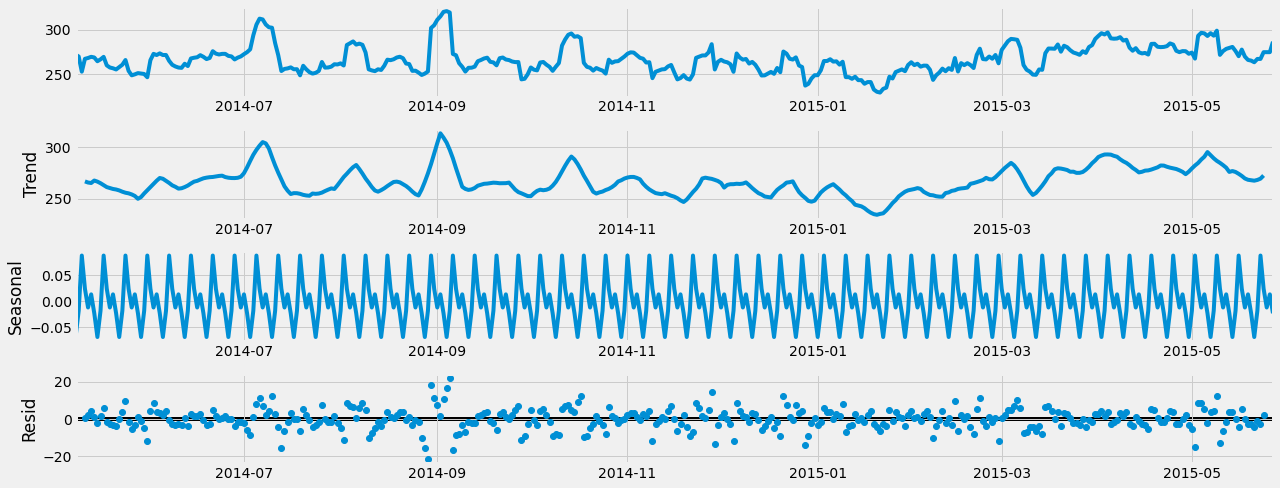

In [22]:
# Plot the components of the time series
decomposition.plot()
plt.show()

The first chart displays the original time series.
<br>The second chart displays the underlying trend: besides some dips and rises the chart doesn't show a clear dominant trend.
<br>The third chart displays the seasonality: seasonal fluctuations seem to occur at regular 7-day intervals.
<br>The fourth chart displays the noise: even though the time series has been smoothed, some unexplained noise is still present.

# 06. Conduct a Dickey-Fuller test to check for stationarity

In [23]:
# Perform the Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

# Apply the test using the function on the time series
dickey_fuller(df_time_final)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.533563
p-value                          0.107520
Number of Lags Used             14.000000
Number of Observations Used    370.000000
Critical Value (1%)             -3.448148
Critical Value (5%)             -2.869383
Critical Value (10%)            -2.570948
dtype: float64


Null hypothesis: a unit root is present (so the data is non-stationary).
<br>Alternative hypothesis: a unit root is NOT present (so the data is stationary).

The 'Test Statistic' is larger than all critical values, thus the null hypothesis CANNOT be rejected at any significance level and the time series is considered non-stationary.

# 07. Stationarizing the data

In [24]:
# Stationarize the time series using 'Differencing'
data_diff = df_time_final - df_time_final.shift(1)

In [25]:
# Remove the missing values that resulted from differencing
data_diff.dropna(inplace = True)

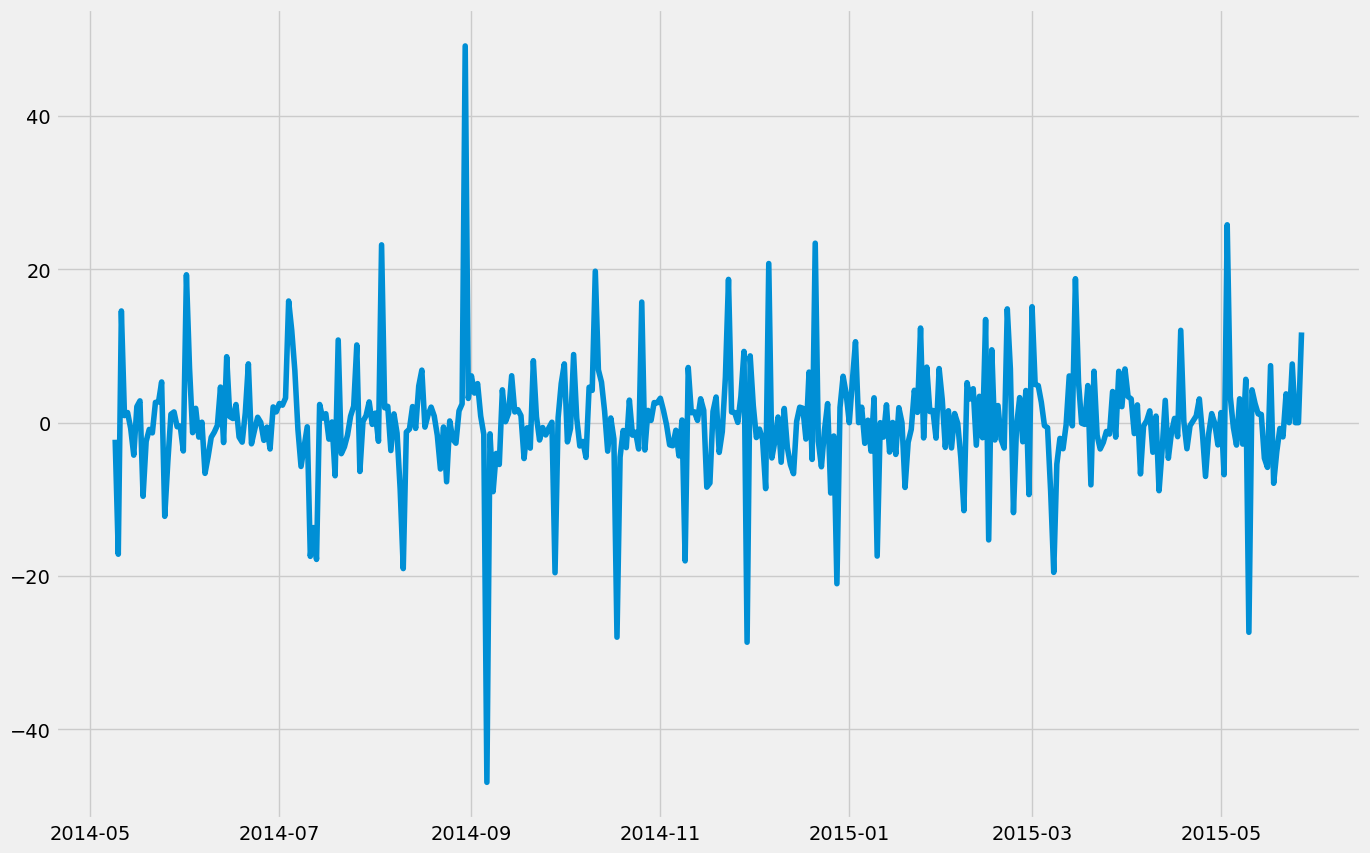

In [26]:
# Create a line chart
plt.figure(figsize=(15, 10), dpi=100)
plt.plot(data_diff)
plt.show()

## Conduct a Dickey-Fuller test to check for stationarity

In [27]:
# Apply the Dickey-Fuller test using the function on the time series
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -9.373718e+00
p-value                        7.261416e-16
Number of Lags Used            1.300000e+01
Number of Observations Used    3.700000e+02
Critical Value (1%)           -3.448148e+00
Critical Value (5%)           -2.869383e+00
Critical Value (10%)          -2.570948e+00
dtype: float64


Null hypothesis: a unit root is present (so the data is non-stationary).
<br>Alternative hypothesis: a unit root is NOT present (so the data is stationary).

The 'Test Statistic' is now smaller than all critical values and the p-value is satisfactory (p < 0.05). 
<br>Therefore the null hypothesis CAN be rejected and the time series is now considered stationary.

# 08. Check data’s autocorrelations

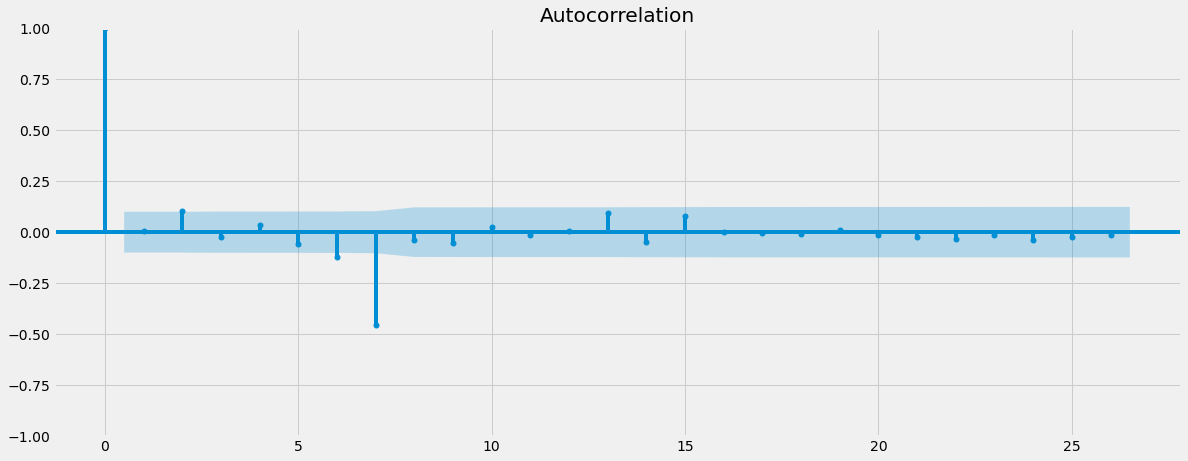

In [28]:
# Check for autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_diff)
plt.show()